In [2]:
import xarray as xr
import Magics.macro as magics

/usr/local/apps/python3/3.6.8-01/lib/python3.6/site-packages/distributed/config.py:20: YAMLLoadWarning: calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.
  defaults = yaml.load(f)


In [2]:
ds = xr.open_dataset('/scratch/ma/mamv/US/netcdf/S_NWC_CTTH_MSG3_Poland-VISIR_20200309T144500Z.nc')

In [3]:
ds

<xarray.Dataset>
Dimensions:            (nx: 900, ny: 430, pal01_colors: 256, pal02_colors: 256, pal03_colors: 256, pal04_colors: 256, pal_RGB: 3)
Coordinates:
    lat                (ny, nx) float32 ...
    lon                (ny, nx) float32 ...
  * ny                 (ny) float32 5103686.0 5100685.5 ... 3819513.2 3816512.8
  * nx                 (nx) float32 -183024.6 -180024.19 ... 2511337.5 2514338.0
Dimensions without coordinates: pal01_colors, pal02_colors, pal03_colors, pal04_colors, pal_RGB
Data variables:
    ctth_pres          (ny, nx) float32 ...
    ctth_alti          (ny, nx) float32 ...
    ctth_tempe         (ny, nx) float32 ...
    ctth_effectiv      (ny, nx) float32 ...
    ctth_method        (ny, nx) float32 ...
    ctth_status_flag   (ny, nx) float32 ...
    ctth_conditions    (ny, nx) float32 ...
    ctth_quality       (ny, nx) float32 ...
    ctth_pres_pal      (pal01_colors, pal_RGB) uint8 ...
    ctth_alti_pal      (pal02_colors, pal_RGB) uint8 ...
    ctth_temp

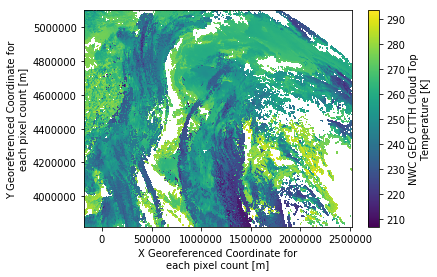

In [6]:
ds.ctth_tempe.plot()

In [4]:
projection = magics.mmap(
    subpage_clipping               = "on",
    subpage_lower_left_latitude    = 30.,
    subpage_lower_left_longitude   = -10.,
    subpage_map_projection         = 'cylindrical',
    subpage_upper_right_latitude   = 70,
    subpage_upper_right_longitude  = 30.,
    page_id_line                   = "off"
    
) 

light_background = magics.mcoast(map_coastline_sea_shade_colour= 'white',
                     map_coastline_land_shade_colour= 'cream',
                     map_grid= 'off',
                     map_coastline_land_shade= 'on',
                     map_coastline_sea_shade= 'on',
                     map_label= 'off',
                     map_coastline_colour= 'tan')

black_background = magics.mcoast(
    map_coastline_sea_shade         =   "on",
    map_coastline_land_shade_colour = "black",
    map_grid                        = "on",
    map_grid_line_style             = "dash",
    map_grid_colour                 = "white",
    map_coastline_land_shade        = "on",
    map_coastline_sea_shade_colour  = "rgb(0.15,0.15,0.15)",
    map_label                       = "on",
    map_coastline_colour            = "tan")

legend = magics.mlegend(
    legend_display_type   = "continuous",
    legend_box_mode       = "automatic",
    legend_box_y_position = 17.00,
    legend_box_x_length   = 32.0,
    legend_box_y_length   = 1.50,
    legend_text_colour    = "charcoal",
    legend_text_font_size = "0.4")

I tried all these *netcdf_type*s, some crash some give error. 

In [3]:
data = magics.mnetcdf(    
    netcdf_filename                  = '/scratch/ma/mamv/US/netcdf/S_NWC_CTTH_MSG3_Poland-VISIR_20200309T144500Z.nc',
    netcdf_type                      = "guess",
    netcdf_latitude_variable         = "lat",
    netcdf_longitude_variable        = "lon",
    netcdf_value_variable            = "ctth_tempe"
    )

In [5]:
magics.plot(projection,light_background,data,magics.mcont())

Magics-warning: Could not guess the type of netcdf: Use default -->matrix

Magics-warning: Netcdf MagException:  Can not find variable ---> x

Magics-ERROR: x : do not find such dimension


Magics-warning: Netcdf MagException :  Can not find dimension ---> x

Magics-warning: No valid X dimension..

Magics-ERROR: Could not find any X axis

Magics-ERROR: Errors reported:Unable to use data - No plot produced  

